In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression

In [46]:
# Load dataset (The filtered data already has survival labels)
labeled_data_path = "/hpc/compgen/users/cchang/Projects/gene_exp_VAE/data/SyNet_Normalized_Expression_Batchcorrected_Labeled_Filtered_Data_Only.csv"

gene_exp_df_labeled = pd.read_csv(labeled_data_path, header=0, index_col=0)
gene_exp_df_labeled

/tmp/ipykernel_2836/3041777942.py:4: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  gene_exp_df_labeled = pd.read_csv(labeled_data_path, header=0, index_col=0)


,GSM107072;Pawitan,GSM107073;Pawitan,GSM107074;Pawitan,GSM107075;Pawitan,GSM107076;Pawitan,GSM107077;Pawitan,GSM107078;Pawitan,GSM107079;Pawitan,GSM107080;Pawitan,GSM107081;Pawitan,...,TCGA-AO-A126-01;TCGA,TCGA-AN-A0XL-01;TCGA,TCGA-AQ-A04H-01;TCGA,TCGA-E2-A106-01;TCGA,TCGA-AO-A12C-01;TCGA,TCGA-E2-A108-01;TCGA,TCGA-BH-A0B2-01;TCGA,TCGA-AO-A12B-01;TCGA,TCGA-E2-A109-01;TCGA,TCGA-AO-A128-01;TCGA
0,3.629049,5.280801,5.242942,4.587148,4.157379,4.954873,4.576248,4.935607,4.565468,5.323089,...,3.935817,4.612530,4.115938,4.623928,4.185827,4.639975,4.573905,3.810780,3.982940,3.717678
1,4.332263,4.463688,3.707902,3.915789,4.222221,4.147906,4.513669,4.028902,4.864491,5.635009,...,4.050414,4.080384,4.025762,3.235018,3.996486,5.317841,5.039106,3.794421,3.964181,5.377281
2,5.242035,4.169501,4.486855,4.602680,4.063071,4.252299,3.543621,5.058134,4.408471,4.092966,...,4.705576,3.424029,4.455273,3.674315,4.592464,4.501536,4.526575,3.690796,5.065513,4.025264
3,4.884504,3.731322,3.508488,4.501715,4.201238,3.440060,4.393966,5.469683,4.310448,3.852134,...,4.364457,4.814460,4.169469,3.953367,4.544988,5.035724,5.079771,3.623044,3.975642,4.060785
4,4.219822,4.804504,3.966309,3.728912,3.943046,4.062714,4.670924,4.612529,4.112489,4.252914,...,3.672407,4.808408,4.156502,3.826710,4.459230,3.866932,4.452758,3.016945,4.581178,4.640118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11744,4.181805,5.370797,4.975893,4.656618,5.065881,5.042039,4.745696,4.369580,4.787775,4.865477,...,4.686425,4.381142,3.535047,4.101880,4.889450,3.875621,4.281827,4.171533,4.584197,4.270049
11745,4.164249,3.530899,4.080236,4.360459,4.060047,3.245546,4.483982,4.728747,5.562333,4.296670,...,5.350998,4.091562,3.980439,4.033849,3.813475,4.264133,4.978350,5.020761,4.708747,3.609987
11746,4.194224,3.458629,4.035481,5.151594,3.714482,3.946568,3.732450,4.192103,5.558449,3.494430,...,3.793907,4.718094,4.785552,3.847064,3.371154,4.589717,4.216605,4.889360,3.924691,4.685001
11747,4.762019,6.531339,3.983910,4.087891,4.630151,4.830090,4.521860,3.575292,4.311377,5.015700,...,4.220087,4.108787,4.703978,3.950621,4.158072,4.055908,4.672804,5.377599,4.746932,5.615012


In [47]:
gene_exp_df_labeled_transposed = gene_exp_df_labeled.T
gene_exp_df_labeled_transposed

,0,1,2,3,4,5,6,7,8,9,...,11739,11740,11741,11742,11743,11744,11745,11746,11747,Surv_label
GSM107072;Pawitan,3.629049,4.332263,5.242035,4.884504,4.219822,4.509033,4.348685,4.136162,4.211880,5.083470,...,4.268632,4.725725,4.913044,4.312997,5.114423,4.181805,4.164249,4.194224,4.762019,0.0
GSM107073;Pawitan,5.280801,4.463688,4.169501,3.731322,4.804504,4.094147,3.744131,4.023317,4.996263,4.613064,...,3.668400,3.700765,5.276134,4.640439,4.500965,5.370797,3.530899,3.458629,6.531339,1.0
GSM107074;Pawitan,5.242942,3.707902,4.486855,3.508488,3.966309,4.816731,3.452848,4.892969,4.955476,4.372226,...,2.947763,5.033894,4.401167,4.951779,4.126470,4.975893,4.080236,4.035481,3.983910,1.0
GSM107075;Pawitan,4.587148,3.915789,4.602680,4.501715,3.728912,5.101369,4.454705,5.733619,3.577702,3.491428,...,4.340441,4.052506,4.539640,4.163752,3.129959,4.656618,4.360459,5.151594,4.087891,1.0
GSM107076;Pawitan,4.157379,4.222221,4.063071,4.201238,3.943046,4.353318,4.621604,4.592652,4.295751,4.216818,...,4.443478,4.342876,3.910991,4.490480,4.164182,5.065881,4.060047,3.714482,4.630151,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-E2-A108-01;TCGA,4.639975,5.317841,4.501536,5.035724,3.866932,4.186158,5.461716,5.152850,3.940720,5.500393,...,4.948575,3.997965,3.898589,5.055530,4.209458,3.875621,4.264133,4.589717,4.055908,0.0
TCGA-BH-A0B2-01;TCGA,4.573905,5.039106,4.526575,5.079771,4.452758,4.192912,5.139907,4.730859,3.750266,4.550624,...,4.574736,4.276593,3.398584,4.377299,4.283245,4.281827,4.978350,4.216605,4.672804,0.0
TCGA-AO-A12B-01;TCGA,3.810780,3.794421,3.690796,3.623044,3.016945,4.621034,5.038800,3.515753,4.656313,4.926070,...,4.404076,3.588396,4.573813,3.489220,3.590420,4.171533,5.020761,4.889360,5.377599,1.0
TCGA-E2-A109-01;TCGA,3.982940,3.964181,5.065513,3.975642,4.581178,4.652957,4.545026,4.263747,4.670502,4.547814,...,3.840754,3.857569,5.884538,3.408843,4.048129,4.584197,4.708747,3.924691,4.746932,0.0


In [25]:
# patient_info_df = pd.read_csv("/hpc/compgen/users/cchang/Projects/gene_exp_VAE/data/Patient_information.csv")
# # print(patient_info_df.head())
# surv_df = patient_info_df.loc[:, ['SurvivalTime', 'PatientID', 'StudyName']]
# surv_df_filtered = surv_df[(surv_df.StudyName != 'Loi') & (surv_df.StudyName != 'Ivshina')]
# print(len(surv_df_filtered))


3970


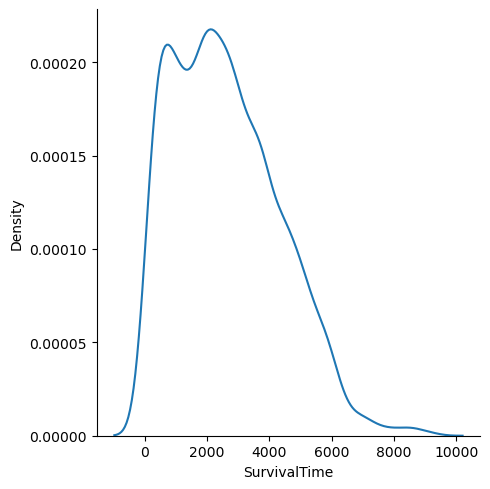

In [34]:
# import seaborn as sns

# data = surv_df_filtered.SurvivalTime
# sns.displot(data, kind="kde")

In [35]:
# surv_df_filtered['Surv_label'] = surv_df_filtered['SurvivalTime'].apply(lambda x: 0 if x < (365*5) else 1)
# surv_df_filtered['ID_Study']=surv_df_filtered.apply(lambda row: str(row.PatientID)+';'+str(row.StudyName), axis=1)
# surv_df_filtered.set_index('ID_Study', inplace=True)
# surv_df_filtered.drop(columns=['SurvivalTime', 'PatientID', 'StudyName'], inplace=True)
# surv_df_filtered

/tmp/ipykernel_2836/144692954.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  surv_df_filtered['Surv_label'] = surv_df_filtered['SurvivalTime'].apply(lambda x: 0 if x < (365*5) else 1)
/tmp/ipykernel_2836/144692954.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  surv_df_filtered['ID_Study']=surv_df_filtered.apply(lambda row: str(row.PatientID)+';'+str(row.StudyName), axis=1)
/tmp/ipykernel_2836/144692954.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

,Surv_label
ID_Study,
GSM107072;Pawitan,0
GSM107073;Pawitan,1
GSM107074;Pawitan,1
GSM107075;Pawitan,1
GSM107076;Pawitan,1
...,...
TCGA-E2-A108-01;TCGA,0
TCGA-BH-A0B2-01;TCGA,0
TCGA-AO-A12B-01;TCGA,1


In [ ]:
# gene_exp_surv_df = gene_exp_df_labeled_transposed.join(surv_df_filtered)
# print(gene_exp_surv_df.head())
# print(gene_exp_surv_df.shape)
# gene_exp_surv_df.to_csv("/hpc/compgen/users/cchang/Projects/gene_exp_VAE/data/SyNet_Normalized_Expression_Par_Surv_Labeled.csv", index=True, header=True)

In [48]:
# Start from here. 
X = gene_exp_df_labeled_transposed.iloc[:, :-1].to_numpy()
print(X.shape)
y = gene_exp_df_labeled_transposed.iloc[:, -1].to_numpy()
print(y.shape)

(3970, 11748)
(3970,)


In [49]:
# Define LASSO model with sklearn Lasso module
lasso_model = Lasso(alpha=0.1)

In [50]:
cv = KFold(n_splits=10, shuffle=True, random_state=1)

scores = cross_val_score(lasso_model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Mean MAE: 0.461 (0.006)


In [51]:
# Define the LASSO (l1 penalty) model with LogisticRegression
logistic_reg_model = LogisticRegression(
    penalty='l1',
    solver='saga',  # or 'liblinear'
    max_iter=800
    )

In [52]:
# Calculate mean MAE of LASSO regression model
cv = KFold(n_splits=10, shuffle=True, random_state=1)
scores = cross_val_score(logistic_reg_model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

/hpc/compgen/users/cchang/Software/miniconda3/envs/synet_vae/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/hpc/compgen/users/cchang/Software/miniconda3/envs/synet_vae/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/hpc/compgen/users/cchang/Software/miniconda3/envs/synet_vae/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/hpc/compgen/users/cchang/Software/miniconda3/envs/synet_vae/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/hpc/compgen/users/cchang/Software/miniconda3/envs/synet_vae/lib/python3.10/site-packages/sklearn/li

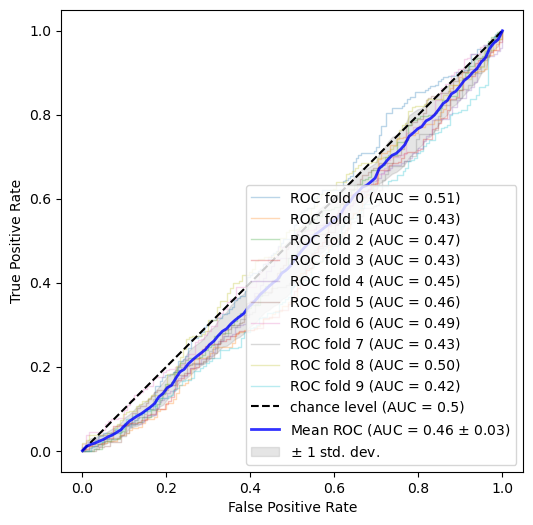

In [42]:
# Calculate AUC of LASSO regression model
cv = KFold(n_splits=10, shuffle=True, random_state=1)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

fig, ax = plt.subplots(figsize=(6, 6))
for fold, (train, test) in enumerate(cv.split(X, y)):  # From here...
    logistic_reg_model.fit(X[train], y[train])
    viz = RocCurveDisplay.from_estimator(
        logistic_reg_model,
        X[test],  # ROC calculated using the test results. 
        y[test],
        name=f"ROC fold {fold}",
        alpha=0.3,
        lw=1,
        ax=ax,
    )                                                   # ...to here, it's doing the same as cross_val_score? Just doing it with train (fit) and test separately?
    interp_tpr = np.interp(mean_fpr, viz.fpr, viz.tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(viz.roc_auc)
ax.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
ax.plot(
    mean_fpr,
    mean_tpr,
    color="b",
    label=r"Mean ROC (AUC = %0.2f $\pm$ %0.2f)" % (mean_auc, std_auc),
    lw=2,
    alpha=0.8,
)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
ax.fill_between(
    mean_fpr,
    tprs_lower,
    tprs_upper,
    color="grey",
    alpha=0.2,
    label=r"$\pm$ 1 std. dev.",
)

ax.set(
    xlim=[-0.05, 1.05],
    ylim=[-0.05, 1.05],
    xlabel="False Positive Rate",
    ylabel="True Positive Rate"
)
ax.axis("square")
ax.legend(loc="lower right")
plt.show()